In [2]:
import pandas as pd

data = pd.read_csv('data.csv', encoding='latin1')

In [3]:
print(len(data))
data.head()

4000


,hz,ampliture,y
0,0.000000,5845.644302,0
1,0.114441,268.892458,0
2,0.228882,259.570802,0
3,0.343323,255.457923,0
4,0.457764,267.371884,0


In [4]:
data.tail()

,hz,ampliture,y
3995,113.868713,31.534474,3
3996,113.983154,20.740961,3
3997,114.097595,10.694307,3
3998,114.212036,12.891697,3
3999,114.326477,18.067423,3


In [5]:
import seaborn as sns

sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="y", palette="husl")

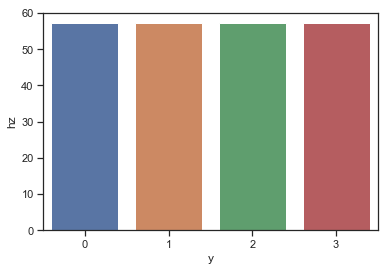

In [6]:
sns.barplot(data['y'], data['hz'], ci=None)

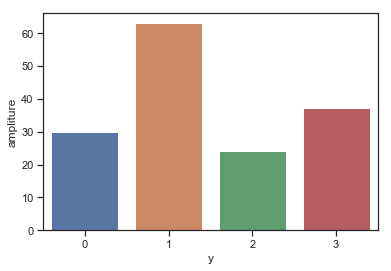

In [7]:
sns.barplot(data['y'], data['ampliture'], ci=None)

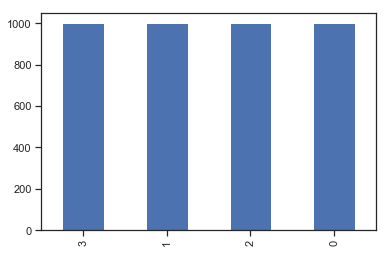

In [8]:
import matplotlib.pyplot as plt

data['y'].value_counts().plot(kind='bar')

In [9]:
from sklearn.model_selection import train_test_split

data_X = data[['hz', 'ampliture']].values
data_y = data['y'].values

print(data_X[:5])
print(data_y[:5])

[[0.00000000e+00 5.84564430e+03]
 [1.14440918e-01 2.68892458e+02]
 [2.28881836e-01 2.59570802e+02]
 [3.43322754e-01 2.55457923e+02]
 [4.57763672e-01 2.67371884e+02]]
[0 0 0 0 0]


In [10]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_y, train_size=0.8, random_state=1)

In [16]:
from tensorflow.keras.models import Sequential # 케라스의 Sequential()을 임포트
from tensorflow.keras.layers import Dense # 케라스의 Dense()를 임포트
from tensorflow.keras import optimizers # 케라스의 옵티마이저를 임포트

model=Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='softmax'))

sgd=optimizers.Adam(lr=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])
history=model.fit(X_train,y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Train on 3200 samples, validate on 800 samples
Epoch 1/50
3200/3200 [==============================] - 1s 359us/sample - loss: 1.3475 - acc: 0.3372 - val_loss: 1.5750 - val_acc: 0.4250
Epoch 2/50
3200/3200 [==============================] - 1s 212us/sample - loss: 1.3194 - acc: 0.3762 - val_loss: 1.3977 - val_acc: 0.3462
Epoch 3/50
3200/3200 [==============================] - 1s 213us/sample - loss: 1.3382 - acc: 0.3653 - val_loss: 1.5522 - val_acc: 0.4075
Epoch 4/50
3200/3200 [==============================] - 1s 213us/sample - loss: 1.3372 - acc: 0.3762 - val_loss: 1.4349 - val_acc: 0.3088
Epoch 5/50
3200/3200 [==============================] - 1s 214us/sample - loss: 1.2583 - acc: 0.4044 - val_loss: 1.8284 - val_acc: 0.4288
Epoch 6/50
3200/3200 [==============================] - 1s 214us/sample - loss: 1.2548 - acc: 0.3991 - val_loss: 1.6021 - val_acc: 0.4275
Epoch 7/50
3200/3200 [==============================] - 1s 214us/sample - loss: 1.2685 - acc: 0.3887 - val_loss: 1.3225 - val

KeyboardInterrupt: 